# **Inferencia estadística**
# IE08. Intervalos de confianza - SOLUCION

## <font color='blue'>__Bibliografía__</font>
* Applied Statistics and Probability for Engineers. Douglas C. Montgomery, George C. Runger, 2013.

* Estadística para Administración y Economía. Paul Newbold, William L. Carlson y Betty Thorne, 2013.

* Estadística Aplicada a los Negocios y la Economía. Allen L. Webster, 2000.

* Statistical methods for research workers. R.A. Fisher, 1925.


## <font color='blue'>__Lecturas__</font>
* Erik Cobo, Belchin Kostov, Jordi Cortés, José Antonio
González y Pilar Muñoz (2014). Intervalos de confianza. Universitat Politècnica de Catalunya. [UPC](https://upcommons.upc.edu/bitstream/handle/2117/186420/08_intervalos_de_confianza-5331.pdf)

* Le Cam, L. (1986). The Central Limit Theorem around 1935. Statistical Science. 1 (1): 78-91.

* Candia, R., & Caiozzi, G. (2005). Intervalos de confianza. Revista médica de Chile, 133(9), 1111-1115.

* Roberto Moraga-Diaz (2022). Intervalos de confianza para la varianza. [Github](https://github.com/robertomoragad/Estadistica/blob/master/Intervalo_de_Confianza_(IC)_para_varianza.ipynb)

In [1]:
# Importamos librerias
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

## <font color='blue'>__Intervalos de Confianza__</font>
### Introducción

Un intervalo de confianza es un rango de valores estimado a partir de datos muestrales, que se utiliza para inferir un parámetro desconocido de la población, como la media o la proporción. Este intervalo se acompaña de un nivel de confianza, que representa la probabilidad de que el parámetro poblacional verdadero se encuentre dentro de ese rango.

Por ejemplo, un intervalo de confianza del 95% para una media poblacional indica que, si se repitieran múltiples muestreos y cálculos del intervalo, aproximadamente el 95% de estos intervalos incluirían el valor verdadero del parámetro.

---

### Importancia de los Intervalos de Confianza (ICs)

- **Estimaciones precisas**: Proveen una visión más completa de un parámetro al ofrecer un rango de valores en lugar de un único punto.
- **Toma de decisiones**: Ayudan a considerar la incertidumbre inherente en las estimaciones al diseñar políticas, productos o investigaciones.
- **Flexibilidad**: Pueden aplicarse a diferentes contextos como proporciones, medias o diferencias entre grupos.

---

### Aplicaciones Prácticas

1. **Investigación de Mercado**: Estimar el porcentaje de consumidores satisfechos con un nivel de confianza especificado.
2. **Control de Calidad**: Evaluar si el rendimiento promedio de un proceso de fabricación cumple con los estándares establecidos.
3. **Salud Pública**: Analizar encuestas de prevalencia de enfermedades y estimar el rango poblacional afectado.


## <font color='blue'>__Repaso de los fundamentos estadísticos para construir ICs__</font>

### Población vs. Muestra

- **Población**: Es el conjunto completo de elementos que se desea estudiar. Puede ser finita (un grupo específico de personas, lugares o cosas) o infinita (como un proceso continuo de producción).  
- **Muestra**: Es un subconjunto representativo de la población, utilizado para inferir características de esta. La calidad de la muestra determina la precisión de las inferencias.

---

### Error de Muestreo y Estimación

- **Error de Muestreo**: Es la diferencia entre un estadístico muestral (como la media de la muestra) y el parámetro verdadero de la población (como la media poblacional).  
- **Estimación**: Consiste en usar datos muestrales para inferir valores de parámetros poblacionales. Hay dos tipos principales:
  1. **Estimación puntual**: Se utiliza un único valor (por ejemplo, la media muestral) para estimar el parámetro.
  2. **Estimación por intervalo**: Proporciona un rango de valores donde se espera que esté el parámetro con un cierto nivel de confianza.

---

### Distribuciones Muestrales

- Una **distribución muestral** es la distribución de un estadístico (como la media o la proporción) obtenido de todas las posibles muestras de un tamaño dado extraídas de la población.  
- Características clave:
  - **Media de la distribución muestral**: Igual a la media poblacional.
  - **Desviación estándar de la distribución muestral (Error estándar)**: Mide la variabilidad de los estadísticos muestrales y disminuye al aumentar el tamaño de la muestra.
- **Distribución de Medias Muestrales:** La distribución muestral del $\bar{x}$ de tamaño muestral $n$, es la distribución que resulta cuando un experimento se lleva a cabo una y otra vez (siempre con tamaño muestral $n$) y obtenemos los distintos valores de $\bar{x}$. Esta distribución, describe la variabilidad de los promedios muestrales alrededor de la media poblacional $\mu$.
  - ss

  ![Distribución medias muestrales](https://drive.google.com/uc?export=view&id=1fq0rIC_l81TnZjzp8dlwsp_6PVI8wsnd)



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Sea $X$ la variable aleatoria observada de una población, y supongamos que $X$ sigue una distribución Normal:


$$X \rightarrow N(\mu, \sigma)$$


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bajo esta suposición, el estadístico muestral $\bar{x}$ también sigue una distribución normal, con media $\mu$ y desviación estándar ajustada por el tamaño de la muestra:



$$\bar{X} \rightarrow N(\mu , \frac{\sigma}{\sqrt{n}})$$

> Esta formulación es válida únicamente cuando se supone que la población tiene una distribución normal. Si $X$ no sigue una distribución normal, la distribución de $\bar{x}$ no será normal, a menos que el tamaño de la muestra n sea suficientemente grande, en cuyo caso aplica el Teorema del Límite Central, permitiendo aproximar la distribución de $\bar{x}$ a una normal.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;La distribución de probabilidad de un estadístico se llama __Distribución Muestral__.
  
  - **Distribución de Proporciones Muestrales:** La distribución muestral de la proporción muestral $\hat{p}$, para un tamaño muestral $n$, es la distribución que resulta cuando un experimento se realiza repetidamente (siempre con tamaño muestral $n$) y se calculan los distintos valores de $\hat{p}$. Esta distribución describe la variabilidad de las proporciones muestrales alrededor de la proporción poblacional $p$.
Como vemos el proceso de las __proporciones muestrales__ es muy similar al que vimos en las __medias muestrales__.


![Distribución proporciones muestrales](https://drive.google.com/uc?export=view&id=1vOhMSjMOoxIi-bePLl0eGRsdrt46bZ9f)

---

### Teorema del Límite Central

- El **Teorema del Límite Central** establece que, al aumentar el tamaño de la muestra, la distribución muestral de la media se aproxima a una distribución normal, independientemente de la distribución de la población original.  
- Este resultado es crucial para construir intervalos de confianza, ya que permite usar la distribución normal en la mayoría de los casos prácticos.

Para ilustrar el teorema del límite central, generaremos una población no normal y construiremos una distribución muestral de la media.




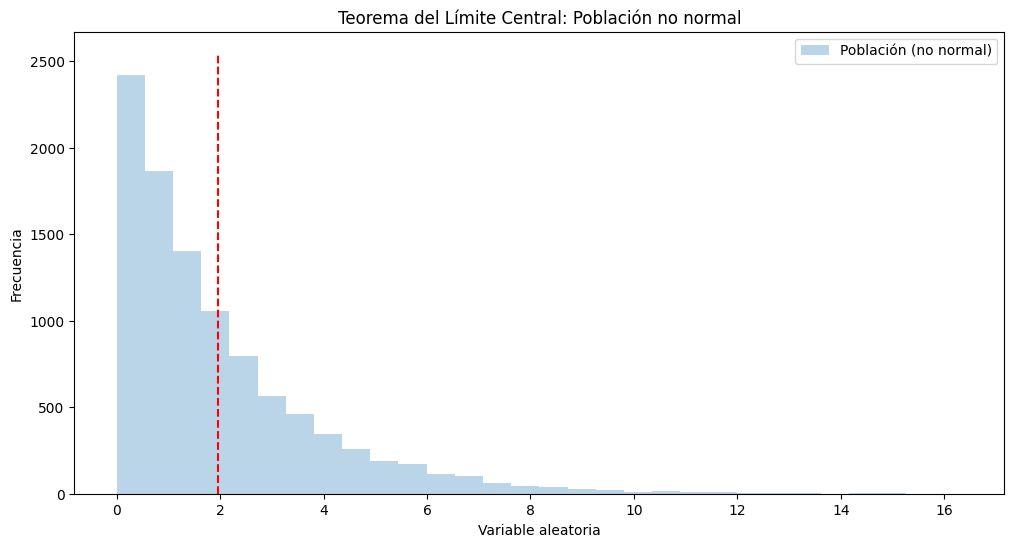

In [2]:
np.random.seed(42)
poblacion = np.random.exponential(scale=2, size=10000)

# Gráfico de la distribución de la población
plt.figure(figsize=(12, 6))
plt.hist(poblacion, bins=30, alpha=0.3, label='Población (no normal)')
plt.vlines(np.mean(poblacion), ymin=0, ymax=plt.ylim()[1], color='red', linestyle='--')
plt.title('Teorema del Límite Central: Población no normal')
plt.xlabel('Variable aleatoria')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


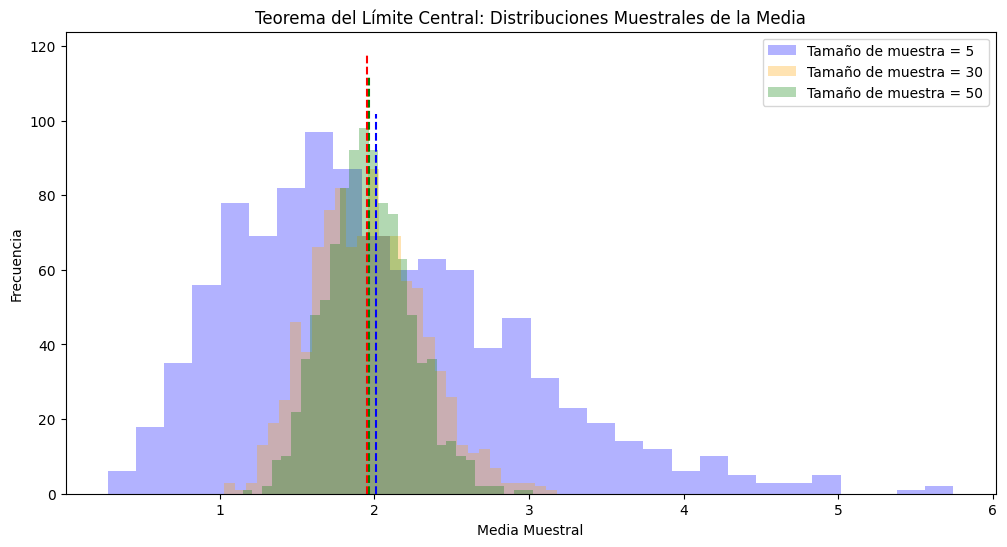

In [3]:
# Función para generar la distribución muestral de la media
def generar_distribucion_muestral(poblacion, tamano_muestra, repeticiones):
    medias_muestrales = [
        np.mean(np.random.choice(poblacion, size=tamano_muestra, replace=True))
        for _ in range(repeticiones)
    ]
    return medias_muestrales

# Generar distribuciones muestrales para diferentes tamaños de muestra
tamano_muestras = [5, 30, 50]
repeticiones = 1000
colores = ['blue', 'orange', 'green']

plt.figure(figsize=(12, 6))

# Graficar las distribuciones muestrales con colores especificados
for tamano, color in zip(tamano_muestras, colores):
    medias = generar_distribucion_muestral(poblacion, tamano, repeticiones)
    plt.hist(medias, bins=30, alpha=0.3, label=f'Tamaño de muestra = {tamano}', color=color)
    plt.vlines(np.mean(medias), ymin=0, ymax=plt.ylim()[1], color=color, linestyle='--')

plt.vlines(np.mean(poblacion), ymin=0, ymax=plt.ylim()[1], color='red', linestyle='--')

plt.title('Teorema del Límite Central: Distribuciones Muestrales de la Media')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

## <font color='blue'>__Componentes de los Intervalos de Confianza__</font>

Un intervalo de confianza se construye combinando información muestral y distribuciones estadísticas para generar un rango de valores que estiman un parámetro poblacional. Sus principales componentes son:

---

### **1. Estimador Puntual**

El estimador puntual es el valor central del intervalo, calculado a partir de los datos muestrales. Representa la mejor estimación del parámetro poblacional.  
Ejemplos:
- La media muestral, $\bar{x}$, estima la media poblacional, $\mu$.
- La proporción muestral, $\hat{p}$, estima la proporción poblacional, $p$.

---

### **2. Margen de Error**

El margen de error determina la amplitud del intervalo y refleja la incertidumbre en la estimación. Combina dos elementos clave:
- **Valor Crítico** ($Z_{\alpha/2}$ o $t_{\alpha/2, n-1}$):  
  - Es el número de desviaciones estándar (o error estándar) que se extienden desde el estimador puntual, basado en el nivel de confianza deseado ($1 - \alpha$).  
  - Depende de la distribución utilizada: normal estándar ($Z$) o $t$ de Student.
- **Error Estándar**:  
  - Representa la variabilidad del estimador debido al tamaño de la muestra y la dispersión de los datos.
  - Fórmulas comunes:
    - Para la media: $\frac{\sigma}{\sqrt{n}}$ o $\frac{s}{\sqrt{n}}$ (si $\sigma$ es desconocida).
    - Para la proporción: $\sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$.

El margen de error completo se expresa como:
$$
E = \text{Valor Crítico} \times \text{Error Estándar}
$$

---

### **3. Nivel de Confianza**

El nivel de confianza es la probabilidad de que el intervalo construido contenga el verdadero parámetro poblacional. Se denota como $1 - \alpha$, donde $\alpha$ es la probabilidad de error. Por ejemplo:
- Un nivel de confianza del 95% implica $\alpha = 0.05$, es decir, un 5% de probabilidad de que el intervalo no incluya el parámetro.

El nivel de confianza afecta directamente al valor crítico ($Z_{\alpha/2}$ o $t_{\alpha/2, n-1}$), que a su vez define la amplitud del intervalo.

---

### **Criterio Previo para Intervalos de Confianza de Proporciones**

Antes de calcular un intervalo de confianza para una proporción, es necesario verificar si se cumple la siguiente condición:

$$
np \geq 5 \quad \text{y} \quad n(1 - p) \geq 5
$$

donde:
- $n$ es el tamaño de la muestra,  
- $p$ es la proporción muestral ($\hat{p}$).

---

### **Importancia del Criterio**
- **Validez de la aproximación normal**: La fórmula del intervalo de confianza para proporciones utiliza la distribución normal como aproximación de la distribución binomial. Esta aproximación es válida solo si tanto el número esperado de éxitos ($np$) como el de fracasos ($n(1-p)$) son mayores o iguales a 5.
- **Evita resultados inexactos**: Si no se cumple esta condición, el intervalo de confianza calculado podría ser incorrecto o poco representativo.

---

### **Fórmulas Comunes para Intervalos de Confianza**

#### __Para la media poblacional ($\mu$):__
1. **Varianza conocida**:
   $$
   IC = \bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
   $$

   - $\bar{x}$: Media muestral.  
   - $Z_{\alpha/2}$: Valor crítico de la distribución normal.  
   - $\sigma$: Desviación estándar poblacional.  
   - $n$: Tamaño de la muestra.


2. **Varianza desconocida y/o nuestras pequeñas** (se usa la distribución $t$ de Student):

   $$
   IC = \bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}
   $$

   - $s$: Desviación estándar muestral.  
   - $t_{\alpha/2, n-1}$: Valor crítico de la distribución $t$ con $(n-1)$ grados de libertad.

   **¿Por qué se usa la distribución $t$ de Student?**
   La distribución t de Student se utiliza en dos casos principales:
    - Cuando la varianza poblacional ($\sigma^2$) es desconocida y, por lo tanto, se debe usar la desviación estándar muestral (s).
	- Cuando el tamaño de la muestra ($n$) es pequeño ($n < 30$), incluso si la varianza se desconoce.

    Ambas condiciones introducen incertidumbre adicional, y la distribución t se ajusta a esa incertidumbre. Cuando n es suficientemente grande, la distribución t se aproxima a la distribución normal estándar (Z).

    Cuando la **varianza poblacional** ($\sigma^2$) es desconocida, la desviación estándar debe estimarse a partir de los datos muestrales. Esta estimación introduce una **incertidumbre adicional** en el cálculo del intervalo de confianza, especialmente para muestras pequeñas. En consecuencia:

    - **Error adicional por varianza desconocida**:  
   En lugar de usar la distribución normal estándar (\(Z\)), que asume una varianza poblacional conocida, se utiliza la distribución $t$ de Student, que ajusta el intervalo para reflejar esta incertidumbre.

    - **Dependencia del tamaño de muestra**:  
   La distribución $t$ es más dispersa (colas más gruesas) que la distribución normal cuando el tamaño de la muestra ($n$) es pequeño. A medida que \(n\) aumenta, la distribución $t$ se aproxima a la normal.

   - **Grados de libertad ($n-1$)**:  
   La forma de la distribución $t$ depende de los **grados de libertad** ($df = n - 1\$), que están relacionados con el tamaño de la muestra. Menor tamaño de muestra implica mayor dispersión de la distribución.




#### __Para la proporción poblacional ($p$):__

Cuando se estima una proporción poblacional $p$ (como la proporción de éxito en un muestreo binomial), el intervalo de confianza se calcula utilizando la distribución normal $Z$, siempre que se cumpla la condición previa:

$$
np \geq 5 \quad \text{y} \quad n(1 - p) \geq 5
$$

La fórmula para el intervalo de confianza es:

$$
IC = \hat{p} \pm Z_{\alpha/2} \cdot \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
$$

- $\hat{p}$: Proporción muestral (\(\hat{p} = \frac{x}{n}\), donde \(x\) son los éxitos).  
- $Z_{\alpha/2}$: Valor crítico de la distribución normal estándar.  
- $n$: Tamaño de la muestra.


__NOTA:__ Si las condiciones no se cumplen $(np < 5$ o $n(1-p) < 5)$, la distribución binomial ya no puede aproximarse con una distribución normal. En ese caso, se debe recurrir a métodos exactos para calcular el intervalo de confianza, como el Intervalo Exacto de Clopper-Pearson o métodos bayesianos, que no dependen de la aproximación normal.

---

### **Relación Consolidada**

El intervalo de confianza se construye como:

$$
IC = \text{Estimador Puntual} \pm (\text{Valor Crítico} \cdot \text{Error Estándar})
$$

Esta fórmula refleja cómo el nivel de confianza, el valor crítico y la variabilidad de los datos determinan la amplitud del intervalo. Cada uno de estos componentes es fundamental para interpretar correctamente los resultados.

### <font color='blue'> Ejemplo de Distribución de Medias Muestrales y cálculos de probabilidades</font>

__Problema:__

El diámetro de las tortas de Girasol se __distribuye normalmente__ con media 18 cm y desviación estandar de 6 cm. En una muestra de 10 tortas, ¿Cuál es la probabilidad de encontrar tortas de diámetro promedio inferior a 16 cm?

1. Calcularemos los estadísticos
2. Visualizaremos la Función de Densidad de Probabilidad de la población y de las muestras.
3. Calcularemos la propabilidad solicitada.

Media poblacional (mu): 18 cm
Desviación estándar poblacional (sigma): 6 cm
Error estándar de la media: 1.90 cm
Valor Z: -1.05
Probabilidad de que la media muestral sea < 16 cm: 0.1459


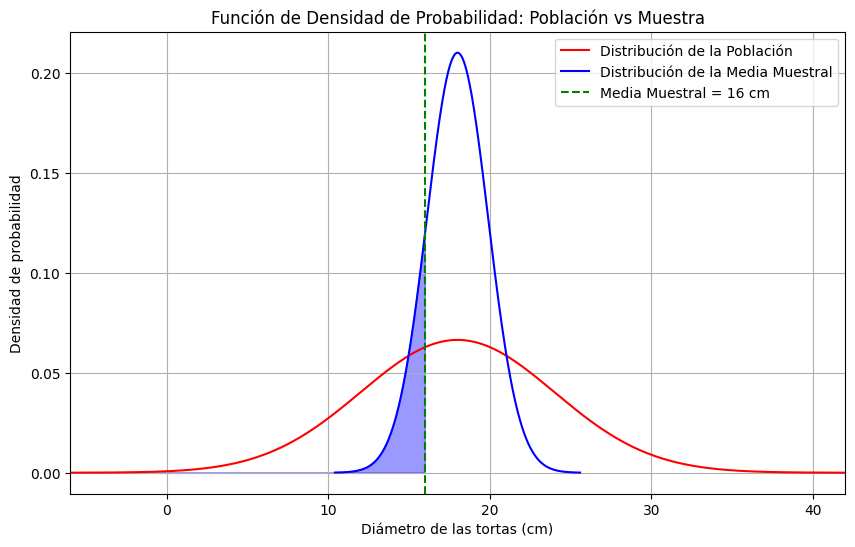

In [4]:
# Solución en los siguientes pasos:
# 1. Calcularemos los estadísticos.
# 2. Visualizaremos la Función de Densidad de Probabilidad (FDP) de la población y la distribución muestral.
# 3. Calcularemos la probabilidad solicitada utilizando la distribución normal.

from scipy.stats import norm

# Parámetros del problema
mu = 18  # Media poblacional
sigma = 6  # Desviación estándar poblacional
n = 10  # Tamaño de la muestra
x_barra = 16  # Valor objetivo: media muestral < 16 cm

# 1. Estadísticos
sigma_muestral = sigma / np.sqrt(n)  # Error estándar de la media

# 2. Cálculo de la probabilidad
# P(X_bar < 16)
z = (x_barra - mu) / sigma_muestral  # Estadístico Z
probabilidad = norm.cdf(z)  # Probabilidad acumulada hasta z

# Imprimir resultados
print(f"Media poblacional (mu): {mu} cm")
print(f"Desviación estándar poblacional (sigma): {sigma} cm")
print(f"Error estándar de la media: {sigma_muestral:.2f} cm")
print(f"Valor Z: {z:.2f}")
print(f"Probabilidad de que la media muestral sea < 16 cm: {probabilidad:.4f}")

# 3. Visualización
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)  # Valores para la FDP poblacional
y = norm.pdf(x, mu, sigma)  # FDP de la población

# Distribución muestral
x_muestral = np.linspace(mu - 4*sigma_muestral, mu + 4*sigma_muestral, 1000)
y_muestral = norm.pdf(x_muestral, mu, sigma_muestral)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Distribución de la Población", color="red")
plt.plot(x_muestral, y_muestral, label="Distribución de la Media Muestral", color="blue")
plt.axvline(x_barra, color="green", linestyle="--", label=f"Media Muestral = {x_barra} cm")

# Sombrear la probabilidad acumulada
x_fill = np.linspace(-100, x_barra, 1000)
plt.fill_between(x_fill, norm.pdf( x_fill, mu, sigma_muestral), alpha=0.4, color="blue")

plt.xlim(mu - 4*sigma, mu + 4*sigma)

# Configuración del gráfico
plt.title("Función de Densidad de Probabilidad: Población vs Muestra")
plt.xlabel("Diámetro de las tortas (cm)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid()
plt.show()


### <font color='blue'> **Ejemplo de Distribución de Proporciones Muestrales y cálculos de probabilidades**</font>
**Problema:**  
En una población de **10.000 clientes**, el **60%** de ellos están satisfechos ($p = 0.6$), mientras que el **40%** no lo está ($1-p = 0.4$). Queremos:  

1. Crear una población ficticia con estos parámetros.  
2. Extraer múltiples muestras y calcular la **proporción muestral** ($\hat{p}$) para cada una.  
3. Graficar la distribución de las proporciones muestrales y compararla con la distribución binomial.


Proporción poblacional: 0.6108
Desviación estándar poblacional: 0.4876
Otra forma de sigma (teórico): 0.4876


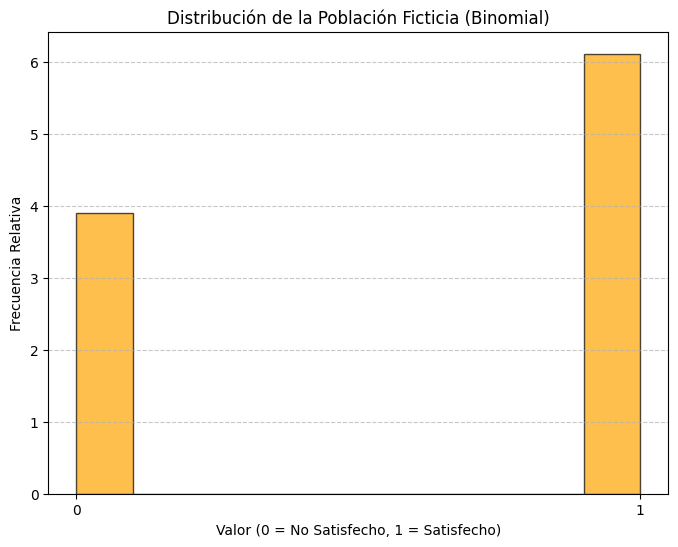

In [5]:
from scipy.stats import binom, norm

# Parámetros del problema
N = 10000  # Tamaño de la población
p = 0.6    # Proporción de clientes satisfechos
n_muestra = 50  # Tamaño de la muestra

# 1. Crear una población ficticia
from scipy.stats import binom, norm

# Parámetros del problema
N = 10000  # Tamaño de la población
p = 0.6    # Proporción de clientes satisfechos
n_muestra = 50  # Tamaño de la muestra

# Crear una población ficticia usando binomial
np.random.seed(42)
poblacion = np.random.binomial(1, p, size=N)  # 1 = éxito, 0 = fracaso

# Estadísticas de la población
media_poblacional = np.mean(poblacion)
desviacion_poblacional = np.std(poblacion)

print(f'Proporción poblacional: {media_poblacional:.4f}')
print(f'Desviación estándar poblacional: {desviacion_poblacional:.4f}')

# Otra forma de calcular sigma usando la fórmula teórica de la binomial
sigma_teorico = np.sqrt(media_poblacional * (1 - media_poblacional))
print(f'Otra forma de sigma (teórico): {sigma_teorico:.4f}')

# 3. Gráfico de la distribución poblacional
plt.figure(figsize=(8, 6))
plt.hist(poblacion, density=True, color='orange', alpha=0.7, edgecolor='black')
plt.title("Distribución de la Población Ficticia (Binomial)")
plt.xlabel("Valor (0 = No Satisfecho, 1 = Satisfecho)")
plt.ylabel("Frecuencia Relativa")
plt.xticks([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Media de las proporciones muestrales: 0.6140
Error estándar teórico: 0.0693


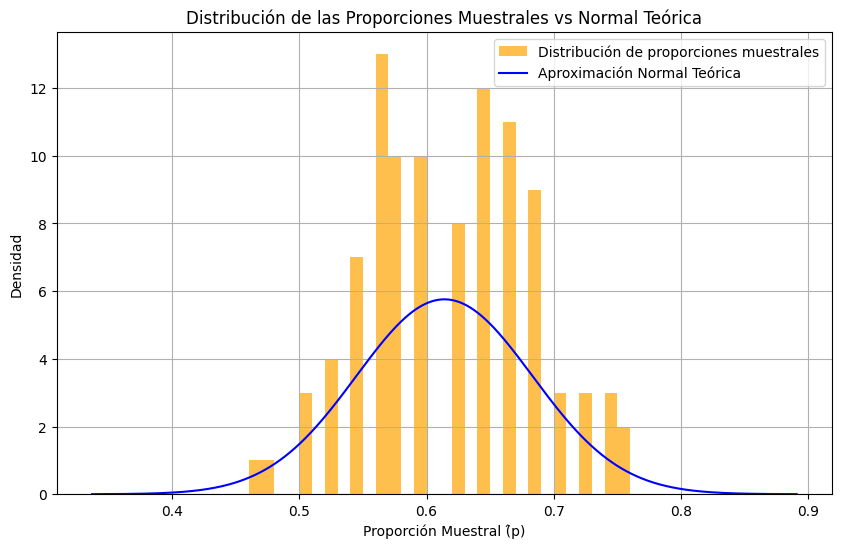

In [6]:
# 2. Extraer múltiples muestras y calcular la proporción muestral
num_muestras = 100  # Número de muestras
proporciones_muestrales = []

for i in range(num_muestras):
    muestra = np.random.choice(poblacion, size=n_muestra, replace=False)
    proporciones_muestrales.append(np.mean(muestra))

# Resultados intermedios
media_proporciones = np.mean(proporciones_muestrales)
error_estandar_teorico = np.sqrt((p * (1 - p)) / n_muestra)

print(f"Media de las proporciones muestrales: {media_proporciones:.4f}")
print(f"Error estándar teórico: {error_estandar_teorico:.4f}")

# 3. Visualización de la distribución muestral de proporciones
plt.figure(figsize=(10, 6))

# Histograma de las proporciones muestrales
plt.hist(proporciones_muestrales, bins=30, density=True, color='orange', alpha=0.7, label="Distribución de proporciones muestrales")

# Superponer la distribución normal teórica
x = np.linspace(media_proporciones - 4*error_estandar_teorico, media_proporciones + 4*error_estandar_teorico, 1000)
y = norm.pdf(x, media_proporciones, error_estandar_teorico)

plt.plot(x, y, color='blue', label="Aproximación Normal Teórica")

# Configuración del gráfico
plt.title("Distribución de las Proporciones Muestrales vs Normal Teórica")
plt.xlabel("Proporción Muestral (\u0302p)")
plt.ylabel("Densidad")
plt.legend()
plt.grid()
plt.show()

### <font color='blue'>**Test de Normalidad**</font>

Para comprobar si los datos muestrales siguen una distribución normal, utilizaremos el **Test de Anderson-Darling**, que evalúa la siguiente hipótesis:

- **$H_0$**: Los datos **siguen** una distribución normal.  
- **$H_1$**: Los datos **NO siguen** una distribución normal.

---

### **Interpretación del Test de Anderson-Darling**
- Si el valor estadístico del test es **menor** al valor crítico dado para un nivel de significancia (e.g., 5%), **no se rechaza** la hipótesis $H_0$ (los datos siguen una distribución normal).  
- Si el valor estadístico es **mayor** que el valor crítico, se **rechaza** la hipótesis $H_0$, concluyendo que los datos no siguen una distribución normal.

Adicionalmente, generaremos una **Gráfica de Probabilidad Normal** usando `probplot` de Scipy, la cual compara los datos muestrales con los cuantiles teóricos de una distribución normal. Si los puntos siguen una línea recta, los datos cumplen con la normalidad.


In [7]:
from scipy.stats import anderson, probplot

# Resultados intermedios de proporciones muestrales ya calculadas
print(f"Media de las proporciones muestrales: {media_proporciones:.4f}")
print(f"Error estándar teórico: {error_estandar_teorico:.4f}")

# Test de Anderson-Darling para comprobar normalidad
resultado_ad = anderson(proporciones_muestrales, dist='norm')

print("\nResultados del Test de Anderson-Darling:")
print(f"Estadístico de prueba: {resultado_ad.statistic:.4f}")
for i in range(len(resultado_ad.critical_values)):
    nivel_significancia = resultado_ad.significance_level[i]
    valor_critico = resultado_ad.critical_values[i]
    print(f"Nivel de significancia: {nivel_significancia:.1f}% | Valor crítico: {valor_critico:.4f}")

# Interpretación del resultado
if resultado_ad.statistic < resultado_ad.critical_values[2]:  # Nivel del 5%
    print("\nNo se rechaza H0: Las proporciones muestrales siguen una distribución normal.")
else:
    print("\nSe rechaza H0: Las proporciones muestrales NO siguen una distribución normal.")



Media de las proporciones muestrales: 0.6140
Error estándar teórico: 0.0693

Resultados del Test de Anderson-Darling:
Estadístico de prueba: 0.6249
Nivel de significancia: 15.0% | Valor crítico: 0.5550
Nivel de significancia: 10.0% | Valor crítico: 0.6320
Nivel de significancia: 5.0% | Valor crítico: 0.7590
Nivel de significancia: 2.5% | Valor crítico: 0.8850
Nivel de significancia: 1.0% | Valor crítico: 1.0530

No se rechaza H0: Las proporciones muestrales siguen una distribución normal.


#### ProbPlot:
El `probplot` genera una gráfica de probabilidad (Probability Plot) que compara los cuantiles de los datos observados con los cuantiles teóricos de una distribución específica, como la normal. Esta herramienta permite evaluar visualmente si los datos siguen la distribución esperada. Si los puntos de los datos observados caen cerca de una línea recta, se puede concluir que los datos tienen un buen ajuste a la distribución teórica. En caso de desviaciones significativas, especialmente en los extremos, se sugiere que los datos no siguen la distribución asumida.

En la gráfica:
- El eje X (cuantiles teóricos) muestra los valores esperados si los datos siguieran una distribución normal.
- El eje Y (cuantiles de las proporciones muestrales) representa los valores observados de las proporciones muestrales.

Interpretación:
Si los puntos se alinean aproximadamente en una línea recta, esto indica que los datos siguen una distribución normal. Desviaciones significativas de esta línea, especialmente en los extremos (colas), sugieren que los datos no cumplen con la normalidad. La gráfica es una herramienta complementaria a los tests formales de normalidad, como Anderson-Darling.

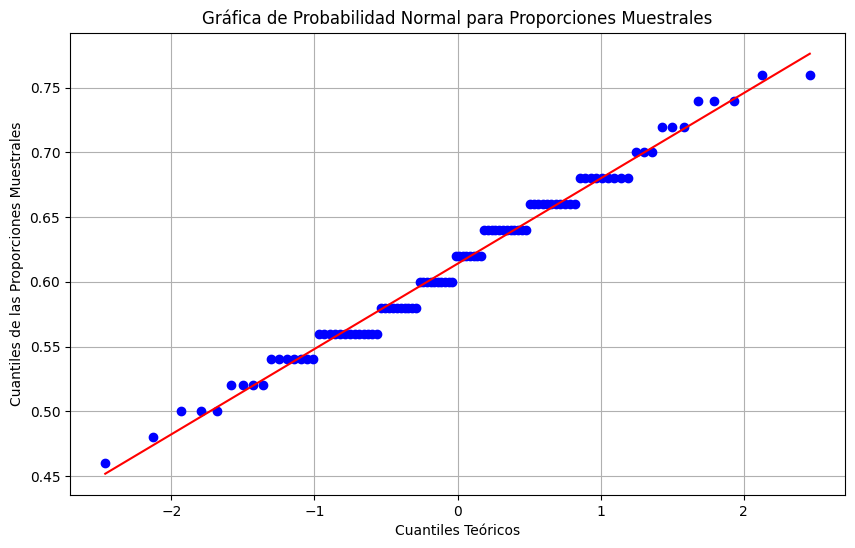

In [8]:
# Gráfica de Probabilidad Normal
plt.figure(figsize=(10, 6))
probplot(proporciones_muestrales, dist="norm", plot=plt)
plt.title("Gráfica de Probabilidad Normal para Proporciones Muestrales")
plt.xlabel("Cuantiles Teóricos")
plt.ylabel("Cuantiles de las Proporciones Muestrales")
plt.grid()
plt.show()

### <font color='green'>Actividad 1</font>

Una población de fuentes de alimentación para micro-computadores tiene un voltaje de salida (output) que sigue una distribución normal de media 5 voltios y desviación estándar 0.1 voltios. Se extrae una muestra aleatoria simple de 8 alimentadores.

1. Obtener la distribución de $\bar{x}$
2. Hallar la probabilidad de que el valor de $\bar{x}$ se desvíe en más de 0.05 voltios de la media poblacional $\mu$ conocida.


Una población de fuentes de alimentación para microcomputadores tiene un voltaje de salida que sigue una distribución normal con una media poblacional de $\mu = 5$ voltios y una desviación estándar de $\sigma = 0.1$ voltios. Se extrae una muestra aleatoria simple de tamaño $n = 8$. Se requiere:
	1.	Determinar la distribución de $\bar{x}$ (la media muestral).
	2.	Calcular la probabilidad de que la media muestral $\bar{x}$ se desvíe en más de 0.05 voltios de la media poblacional $\mu$.
	3.	Visualizar las distribuciones de la población, las medias muestrales y la región correspondiente al límite de desviación.

Nota: Como la población sigue una distribución normal y se conoce \sigma, se puede asumir que $\bar{x} \sim N\left(\mu, \frac{\sigma}{\sqrt{n}}\right)$, incluso para muestras pequeñas ($n < 30$).

In [ ]:
# Tu código aquí ...



<font color='green'>Fin actividad 1</font>

### <font color='green'>Actividad 2</font>

En una universidad, se sabe que el 60% de los estudiantes fuman cigarrillos (p = 0.6). Se toma una muestra aleatoria simple de tamaño n = 800. Se requiere:

1.	Calcular la probabilidad de que la proporción muestral de estudiantes que fuman cigarrillos ($\hat{p}$) sea menor que 0.55.
2.	Visualizar la distribución muestral de $\hat{p}$ y marcar el límite de 0.55.

Nota: Debido al gran tamaño de la muestra ($n = 800$), podemos asumir que la distribución muestral de $\hat{p}$ sigue una distribución normal con media $p = 0.6$ y error estándar:


$$\sigma_{\hat{p}} = \sqrt{\frac{p(1-p)}{n}}$$


In [ ]:
# Tu código aquí ...



<font color='green'>Fin actividad 2</font>

### <font color='blue'>**Ejemplo de IC de media poblacional para muestras grandes**</font>

Se realizó un estudio para evaluar la satisfacción de los clientes de la nueva aplicación de compras “cornerTop”. A una muestra aleatoria de n = 172 clientes se les pidió calificar su experiencia de compra en una escala de 1 a 5. Los resultados arrojaron:
- Media muestral, $\bar{x} = 4.38$
- Desviación estándar muestral,  $S = 0.70$

Con base en estos datos:
1. Calcule los Intervalos de Confianza (IC) del 95% y 99% para la media poblacional (\mu).
2. Visualice la distribución muestral junto con los límites de los intervalos de confianza.

Intervalo de Confianza al 95%: [4.28, 4.48] (Z=1.9600)
Intervalo de Confianza al 99%: [4.24, 4.52] (Z=2.5758)


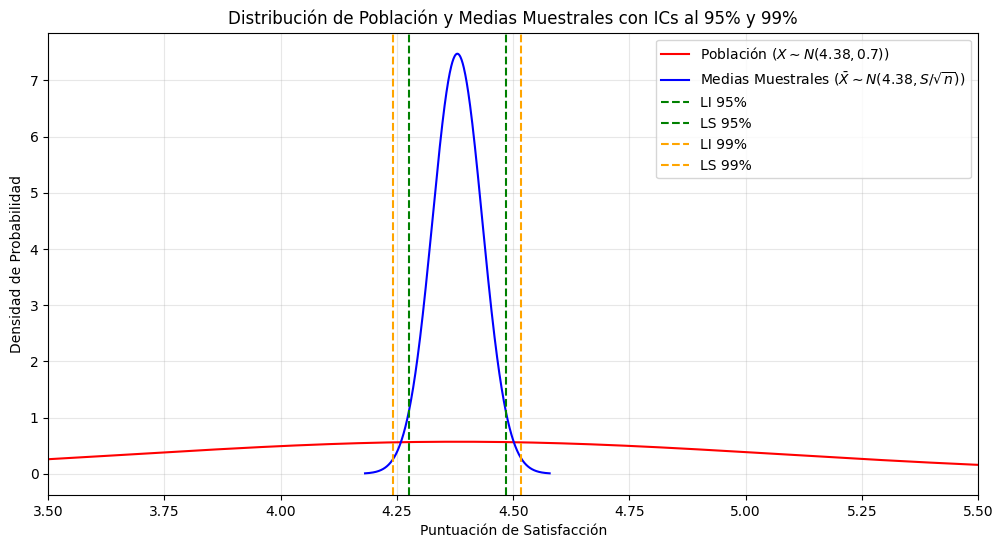

In [9]:
# Datos
n = 172           # Tamaño de la muestra
xbar = 4.38       # Media muestral
S = 0.7           # Desviación estándar muestral

# Función para calcular Intervalos de Confianza
def calcular_ic(n, xbar, S, NC):
    alpha = 1 - NC
    Z = norm.ppf(1 - alpha / 2)  # Valor crítico Z
    margen_error = Z * (S / np.sqrt(n))  # Margen de error
    LI = xbar - margen_error
    LS = xbar + margen_error
    return LI, LS, Z

# Calcular ICs para NC=95% y NC=99%
LI_95, LS_95, Z_95 = calcular_ic(n, xbar, S, 0.95)
LI_99, LS_99, Z_99 = calcular_ic(n, xbar, S, 0.99)

# Mostrar resultados
print(f"Intervalo de Confianza al 95%: [{LI_95:.2f}, {LS_95:.2f}] (Z={Z_95:.4f})")
print(f"Intervalo de Confianza al 99%: [{LI_99:.2f}, {LS_99:.2f}] (Z={Z_99:.4f})")

# Visualización de las distribuciones
S_xbar = S / np.sqrt(n)  # Desviación estándar de la media muestral

# Distribución de la población
poblacion = norm(xbar, S)
x_poblacion = np.linspace(poblacion.ppf(0.0001), poblacion.ppf(0.9999), 500)
pdf_poblacion = poblacion.pdf(x_poblacion)

# Distribución de las medias muestrales
medias = norm(xbar, S_xbar)
x_medias = np.linspace(medias.ppf(0.0001), medias.ppf(0.9999), 500)
pdf_medias = medias.pdf(x_medias)

# Gráficos
plt.figure(figsize=(12, 6))
plt.plot(x_poblacion, pdf_poblacion, 'r', label='Población ($X \sim N(4.38, 0.7)$)')
plt.plot(x_medias, pdf_medias, 'b', label='Medias Muestrales ($\\bar{X} \sim N(4.38, S/\\sqrt{n})$)')
plt.axvline(LI_95, color='green', linestyle='--', label='LI 95%')
plt.axvline(LS_95, color='green', linestyle='--', label='LS 95%')
plt.axvline(LI_99, color='orange', linestyle='--', label='LI 99%')
plt.axvline(LS_99, color='orange', linestyle='--', label='LS 99%')
plt.title('Distribución de Población y Medias Muestrales con ICs al 95% y 99%')
plt.xlabel('Puntuación de Satisfacción')
plt.ylabel('Densidad de Probabilidad')
plt.xlim(3.5, 5.5) # ***** Activa y desctiva esta línea
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [10]:
# Forma simple usando Scipy para calcular ICs
NC_95 = 0.95
NC_99 = 0.99

IC95 = norm.interval(NC_95, loc=xbar, scale=S_xbar)
IC99 = norm.interval(NC_99, loc=xbar, scale=S_xbar)

# Resultados
print(f"Intervalo de Confianza al 95% (forma simple): [{IC95[0]:.2f}, {IC95[1]:.2f}]")
print(f"Intervalo de Confianza al 99% (forma simple): [{IC99[0]:.2f}, {IC99[1]:.2f}]")


Intervalo de Confianza al 95% (forma simple): [4.28, 4.48]
Intervalo de Confianza al 99% (forma simple): [4.24, 4.52]


### <font color='green'>Actividad 3: IC de Media Poblacional y muestras pequeñas</font>
Un artículo publicado en el Journal of Testing and Evaluation presenta 20 mediciones del tiempo de combustión residual (en segundos) de especímenes tratados de ropa de dormir para niños. Los datos proporcionados son los siguientes:

```python
tiempo = (9.85, 9.93, 9.75, 9.77, 9.67, 9.87, 9.67, 9.94, 9.85, 9.75, 9.83, 9.92, 9.74, 9.99, 9.88, 9.95, 9.95, 9.93, 9.92, 9.89)
```
1. Se desea encontrar un IC del 95% para el tiempo de combustión residual promedio.

In [ ]:
tiempo = (9.85, 9.93, 9.75, 9.77, 9.67, 9.87, 9.67, 9.94, 9.85, 9.75,
          9.83, 9.92, 9.74, 9.99, 9.88, 9.95, 9.95, 9.93, 9.92, 9.89)

In [ ]:
# Tu código aquí ...


<font color='green'>Fin actividad 3</font>

### <font color='blue'>**Ejemplo de IC en proporciones**</font>

En una ciudad, se selecciona aleatoriamente una muestra de 600 personas y se les pregunta si consideran que el tráfico es aceptablemente fluido. 250 personas responden afirmativamente.

Objetivo:

Calcular el intervalo de confianza del 90% para la proporción poblacional de ciudadanos que consideran aceptable la fluidez del tráfico.


In [11]:
import numpy as np
from scipy.stats import norm

# Datos
n = 600                     # Tamaño de la muestra
x = 250                     # Número de éxitos (respuestas afirmativas)
p = x / n                   # Proporción muestral
S = np.sqrt(p * (1 - p))    # Desviación estándar de la proporción muestral

# Nivel de confianza
NC = 0.90
alpha = 1 - NC
alpha_medio = alpha / 2

# Valor crítico Z para dos colas
Z = norm.ppf(1 - alpha_medio)  # Valor crítico Z para IC del 90%

# Cálculo manual del intervalo de confianza
LI = p - Z * (S / np.sqrt(n))
LS = p + Z * (S / np.sqrt(n))

# Resultados
print("Cálculo del Intervalo de Confianza del 90%:")
print(f"Proporción muestral (p̂): {p:.4f}")
print(f"Desviación estándar muestral: {S:.4f}")
print(f"Valor crítico Z: {Z:.4f}")
print(f"Intervalo de Confianza (90%): [{LI:.4f}, {LS:.4f}]")
print()

# Forma simple con Scipy
IC90 = norm.interval(NC, loc=p, scale=S / np.sqrt(n))
print(f"IC al 90% para la proporción poblacional (forma simple): [{IC90[0]:.4f}, {IC90[1]:.4f}]")

Cálculo del Intervalo de Confianza del 90%:
Proporción muestral (p̂): 0.4167
Desviación estándar muestral: 0.4930
Valor crítico Z: 1.6449
Intervalo de Confianza (90%): [0.3836, 0.4498]

IC al 90% para la proporción poblacional (forma simple): [0.3836, 0.4498]


### <font color='green'>Actividad 4</font>

Una de las últimas encuestas sobre los candidatos a las elecciones de diciembre del 2005 indica que la candidata Marta Mujica obtiene un 49% de las preferencias.

La ficha técnica de la muestra proporciona los siguientes datos:
- Tamaño de la muestra ($n$): 830
- Proporción muestral ($p$): 0.49
- Nivel de confianza: 95%
- Error muestral: 0.034

Objetivo

1. Construir el intervalo de confianza del 95% para la proporción poblacional.
2. Comparar el error muestral calculado con el proporcionado en la ficha técnica.

In [ ]:
# Tu código aqui ...



<font color='green'>Fin actividad 4</font>

## <font color='blue'>**Determinación del Tamaño Apropiado de la Muestra**</font>

### **Para Estimar Medias**

Para determinar el **tamaño de una muestra** adecuado al estimar un **promedio poblacional**, se deben considerar los siguientes elementos clave:

1. **Margen de Error (EM):**  
   Es la precisión deseada en la estimación, es decir, cuánto se permite que la media muestral se desvíe de la media poblacional.

2. **Nivel de Confianza ($1 - \alpha$)**:  
   Representa la probabilidad de que el intervalo calculado contenga el verdadero valor del parámetro poblacional. A mayor nivel de confianza, mayor será el tamaño de la muestra.

3. **Desviación Estándar Poblacional ($\sigma$)**:  
   Es la medida de dispersión o heterogeneidad de la variable en estudio. Una mayor dispersión requiere una muestra más grande para lograr la misma precisión.


**Fórmula General para el Tamaño de la Muestra**

Para garantizar que el margen de error sea menor o igual a un valor deseado ($EM$), se utiliza la siguiente relación:

$$
z_{1-\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} \leq EM
$$

Despejando $n$ (el tamaño de la muestra), obtenemos:

$$
n \geq \left( z_{1-\alpha/2} \cdot \frac{\sigma}{EM} \right)^2
$$


---

### **Para Estimar Proporciones**

Cuando el objetivo es estimar una **proporción poblacional** ($p$), se deben considerar:

1. **Proporción Muestral ($\hat{p}$):**  
   La proporción de éxitos observados en la muestra ($\hat{p} = \frac{x}{n}$). Si no se tiene una estimación previa, se asume el caso más conservador ($\hat{p} = 0.5$).

2. **Margen de Error (EM):**  
   La precisión deseada para la estimación de la proporción.

3. **Nivel de Confianza ($1 - \alpha$)**:  
   Representa el grado de certeza de que el intervalo contenga el valor verdadero de la proporción poblacional.


__Fórmula General para el Tamaño de la Muestra__

Para garantizar que el margen de error sea menor o igual a un valor deseado ($EM$), se utiliza la siguiente relación:

$$
z_{1-\alpha/2} \cdot \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}} \leq EM
$$

Despejando $n$:

$$
n \geq \frac{z_{1-\alpha/2}^2 \cdot \hat{p}(1 - \hat{p})}{EM^2}
$$

Donde:

- $z_{1-\alpha/2}$: Valor crítico de la distribución normal estándar asociado al nivel de confianza deseado.  
- $\hat{p}$: Proporción muestral o proporción estimada $hat{p} = 0.5$ si no se tiene información previa.  
- $EM$: Margen de error deseado.  
- $n$: Tamaño de la muestra (variable a determinar).  

---

### **Comparación entre Medias y Proporciones**
- **Para medias**: El tamaño de la muestra depende de la desviación estándar ($\sigma$).  
- **Para proporciones**: El tamaño de la muestra depende de la proporción estimada ($\hat{p}$) y es más conservador si se utiliza $\hat{p} = 0.5$.  

---

### **Ejemplo Comparativo**

1. **Medias**:  
   
   Si $\sigma = 10$, $EM = 2$, $z_{1-\alpha/2} = 1.96$:
   $$
   n \geq \left( \frac{1.96 \cdot 10}{2} \right)^2 = 96.04
   $$

2. **Proporciones**:  
   Si $\hat{p} = 0.5$, $EM = 0.05$, $z_{1-\alpha/2} = 1.96$:
   
   $$
   n \geq \frac{1.96^2 \cdot 0.5 \cdot 0.5}{0.05^2} = 384.16
   $$

En este caso, el tamaño de muestra para proporciones es mayor debido a la mayor incertidumbre asociada a la estimación de proporciones.

### <font color='blue'>**Ejemplo para medias**</font>

Una tienda local vende bolsas de plástico para basura y ha recibido quejas sobre su resistencia. Se afirma que estas bolsas son menos resistentes que las de sus competidores, ya que tienden a romperse más fácilmente.

El gerente de adquisiciones desea estimar el peso máximo promedio que puede soportar una bolsa de basura antes de romperse. Si la desviación estándar del peso límite que puede soportar una bolsa es $\sigma = 1.2$  kg, determine el tamaño de la muestra necesario para garantizar, con un 95% de confianza, que el peso promedio esté dentro de $\pm 0.5$ kg del verdadero promedio.


In [12]:
import math
from scipy.stats import norm

# Datos
sigma = 1.2       # Desviación estándar poblacional (kg)
EM = 0.5          # Margen de error (kg)
NC = 0.95         # Nivel de confianza
alpha = 1 - NC    # Significancia

# Valor crítico Z para un nivel de confianza del 95%
z_critico = norm.ppf(1 - alpha / 2)

# Tamaño de la muestra
n = math.ceil((z_critico * sigma / EM) ** 2)  # Redondeamos hacia arriba para asegurar el tamaño mínimo

# Resultados
print("Cálculo del Tamaño de Muestra:")
print(f"Valor crítico Z: {z_critico:.4f}")
print(f"Tamaño de la muestra necesario: {n} bolsas")

Cálculo del Tamaño de Muestra:
Valor crítico Z: 1.9600
Tamaño de la muestra necesario: 23 bolsas


### <font color='blue'>**Ejemplo para proporciones**</font>

Se desea estimar la proporción de familias de una ciudad que poseen microondas mediante una muestra aleatoria de tamaño $n$. Para garantizar que, con un nivel de confianza del 95%, el error en la estimación sea menor que 0.05, se calcula el tamaño mínimo de la muestra necesario.

Nota:
Como se desconoce la proporción poblacional ($p$), se toma el caso más desfavorable, $p = 0.5$, que maximiza la variabilidad y, por lo tanto, el tamaño de la muestra.



In [13]:
import math
from scipy.stats import norm

# Datos
p = 0.5          # Proporción poblacional (caso más desfavorable)
EM = 0.05        # Margen de error
NC = 0.95        # Nivel de confianza
alpha = 1 - NC   # Nivel de significancia

# Valor crítico Z para un nivel de confianza del 95%
z_critico = norm.ppf(1 - alpha / 2)

# Tamaño de la muestra
n = math.ceil((z_critico**2 * p * (1 - p)) / EM**2)  # Redondear hacia arriba

# Resultados
print("Cálculo del Tamaño de Muestra:")
print(f"Valor crítico Z: {z_critico:.4f}")
print(f"Tamaño de la muestra necesario: {n}")

Cálculo del Tamaño de Muestra:
Valor crítico Z: 1.9600
Tamaño de la muestra necesario: 385


<img src="https://drive.google.com/uc?export=view&id=1bqkJJ7QiIOTsp-7jm5eUtK-XYWMEq2_K" width="100" align="left" />
<br clear="left">

## <font color='blue'>**Resumen**</font>



Un intervalo de confianza (IC) es un rango de valores dentro del cual se espera que se encuentre un parámetro de población con un cierto nivel de confianza. Un intervalo de confianza se calcula a partir de una muestra de datos y se utiliza para hacer inferencias sobre la población a partir de la cual se extrajo la muestra.

El valor de confianza es la probabilidad de que el intervalo de confianza contenga el parámetro de población. Por ejemplo, un intervalo de confianza del 95% significa que hay un 95% de probabilidad de que el intervalo contenga el parámetro de población.

Hay dos tipos principales de intervalos de confianza:

* Intervalos de confianza para medias: se utilizan para estimar la media de una población a partir de una muestra de datos.
* Intervalos de confianza para proporciones: se utilizan para estimar la proporción de una población binomial a partir de una muestra de datos.

Los intervalos de confianza son una herramienta valiosa para hacer inferencias sobre la población a partir de la cual se extrajo la muestra. Se utilizan en una variedad de campos, incluyendo la investigación, la calidad y la industria.

## <font color='blue'>Otros ejemplos de aplicación de Intervalos de Confianza</font>

### Minería
1. **Estimación de la Ley Promedio de Mineral**  
   - Una empresa minera toma muestras de distintas ubicaciones en un yacimiento para determinar la concentración promedio de un mineral valioso, como el cobre.  
   - **Intervalo de confianza**: Un intervalo de confianza del 95% podría usarse para estimar la ley promedio del mineral en todo el yacimiento, considerando la variabilidad de las muestras.  
   - **Impacto**: Proveer un rango confiable permite a la empresa tomar decisiones estratégicas sobre la viabilidad económica de la extracción.

2. **Evaluación del Agua en Proximidad a Minas**  
   - Un análisis de la calidad del agua en cuerpos cercanos a operaciones mineras puede incluir la medición de contaminantes como arsénico o metales pesados.  
   - **Intervalo de confianza**: Determinar un rango para la concentración promedio de contaminantes con un nivel de confianza del 99%, asegurando que no se excedan límites regulatorios.  
   - **Impacto**: Los resultados pueden utilizarse para diseñar medidas de mitigación y cumplir con las normativas ambientales.

---

### Medioambiente (Polución y Residuos en Vertederos)
1. **Emisiones de Gases de Efecto Invernadero (GEI) en Vertederos**  
   - Los investigadores miden las emisiones de metano (CH₄) de un vertedero durante un período. Debido a la variabilidad temporal de las emisiones, se necesitan intervalos de confianza para estimar las emisiones promedio diarias.  
   - **Intervalo de confianza**: Calcular un intervalo de confianza del 90% para las emisiones promedio de metano permite identificar si se cumplen los estándares de emisiones establecidos.  
   - **Impacto**: Estos datos respaldan decisiones sobre la instalación de sistemas de captura de gas o mejora en la gestión de residuos.

2. **Concentración de Partículas PM2.5 y PM10**  
   - En zonas urbanas cercanas a fuentes de contaminación (vertederos, plantas industriales), se monitorizan las concentraciones de partículas finas en el aire.  
   - **Intervalo de confianza**: Estimar un rango de valores para las concentraciones promedio mensuales con un nivel de confianza del 95%.  
   - **Impacto**: Identificar períodos de alto riesgo para la salud pública y aplicar restricciones o controles más estrictos en la emisión de partículas.

3. **Estudio de Calidad del Suelo**  
   - Se analiza el contenido de metales pesados en muestras de suelo cercanas a vertederos.  
   - **Intervalo de confianza**: Generar un intervalo del 95% para la concentración promedio de plomo permite verificar si excede niveles tóxicos para cultivos o la salud humana.  
   - **Impacto**: Ayuda a implementar planes de remediación ambiental en las zonas afectadas.
